# INFO7390 - Final Project - Hotel Booking Cancellation Prediction

   ##### Team Members :-
   - Anuja Thatte - 002107348
   - Shreya Iyer - 001300102
   - Aditya Kinare - 001095881
   - Kunal Desai - 002193570

In [169]:
# Import all the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [85]:
# Import data
hotelData = pd.read_csv('hotel_bookings.csv')

In [86]:
# Take a quick look at the data
hotelData.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [87]:
# Get data summary
hotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2. Exploratory Data Analysis

## Univariate Analysis

##### Q1) Which agent makes most no. of bookings?

<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

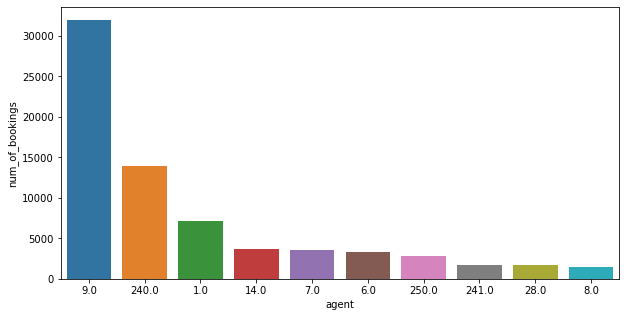

In [88]:
d1 = pd.DataFrame(hotelData['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

#### Agent no. 9 has made most no. of bookings.

#### Q2) Which meal type is most preffered meal of customers?

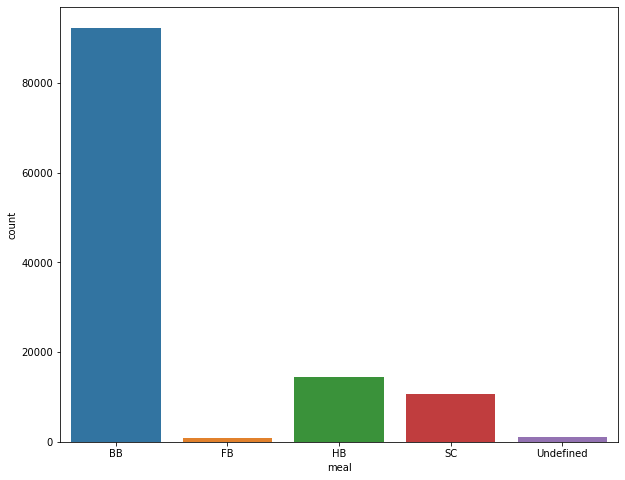

In [90]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hotelData['meal'])
plt.show()

#### Most preferred meal type is BB (Bed and breakfast).

### (1) Hotel wise analysis 

#### Q1) What is percentage of bookings in each hotel?

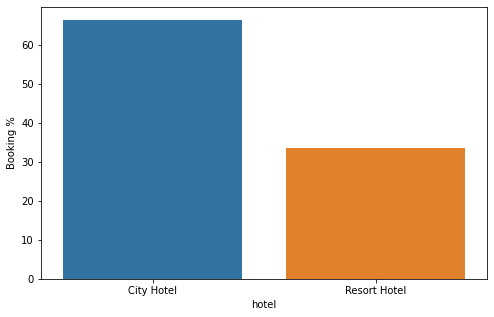

In [91]:
grouped_by_hotel = hotelData.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotelData.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

#### Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.


#### Q2)  Which hotel seems to make more revenue?

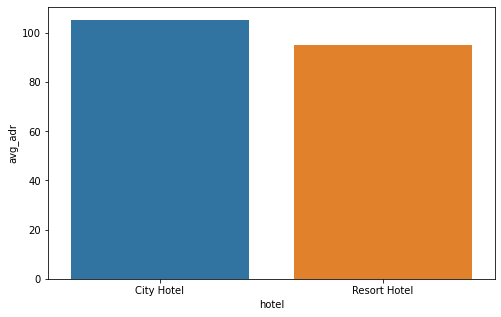

In [92]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

#### Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

#### Q3)   Which hotel has higher lead time?

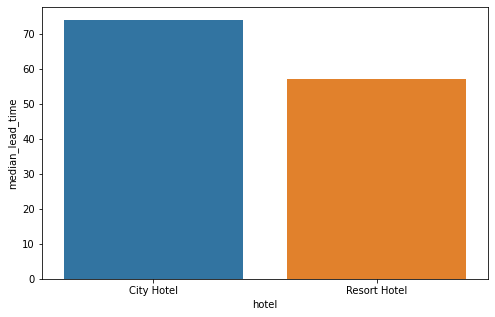

In [93]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

#### City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

#### Q4) What is preferred stay length in each hotel?

In [94]:
# Adding total staying days in hotels
hotel_df=hotelData
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['babies']

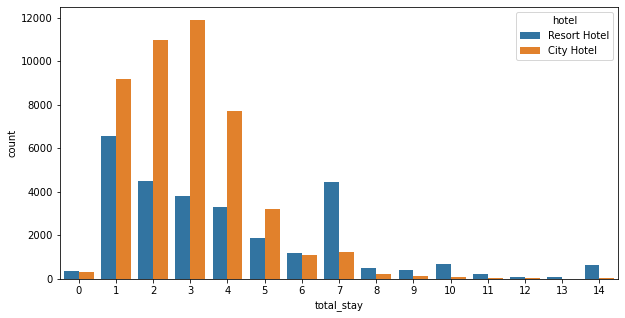

In [95]:
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

#### Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

#### Q5) Which hotel has longer waiting time?


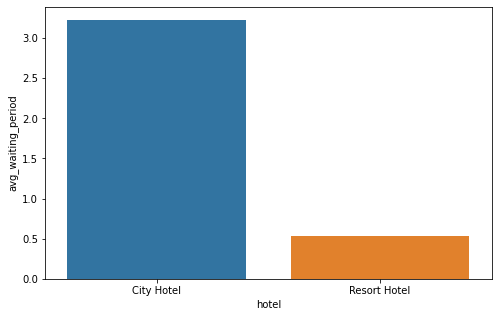

In [96]:

d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

#### City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

#### Q6) Which hotel has higher bookings cancellation rate.

In [97]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel_df[hotel_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33102,79330,41.73
Resort Hotel,11122,40060,27.76


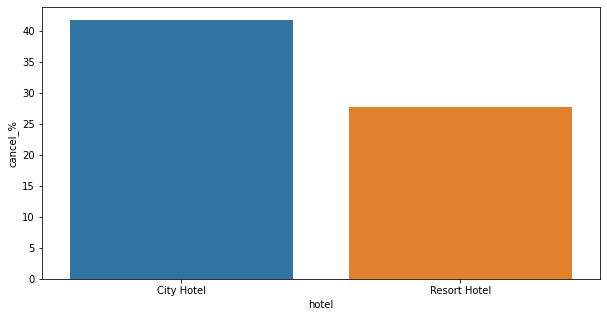

In [99]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

### (2) Distribution Channel wise Analysis

#### Q1) Which is the most common channel for booking hotels?

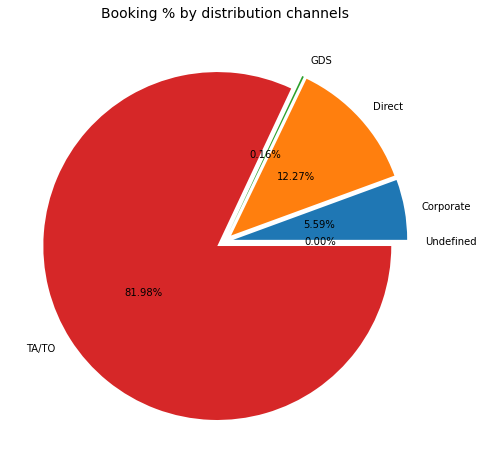

In [100]:
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

#### Q2) Which channel is mostly used for early booking of hotels?

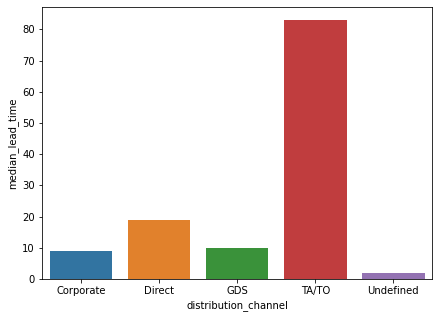

In [101]:
group_by_dc = hotel_df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

#### Q3) Which distribution channel brings better revenue generating deals for hotels?

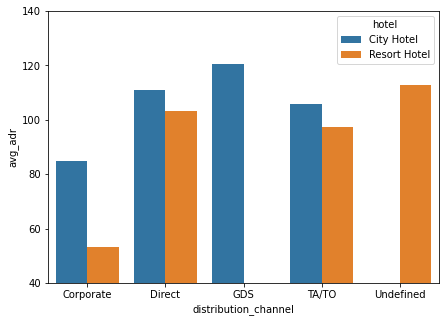

In [102]:
group_by_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

### (3) Booking cancellation Analysis 

#### Let us try to understand what causes the people to cancel the booking.


#### Q1) Which significant distribution channel has highest cancellation percentage?

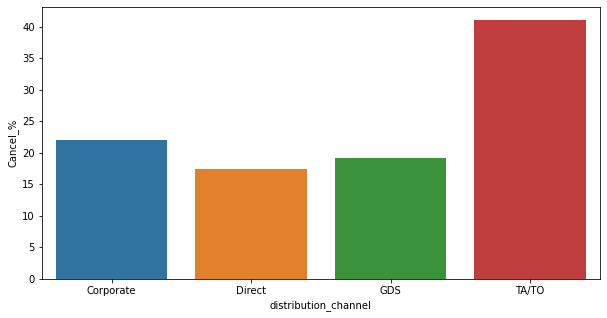

In [103]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

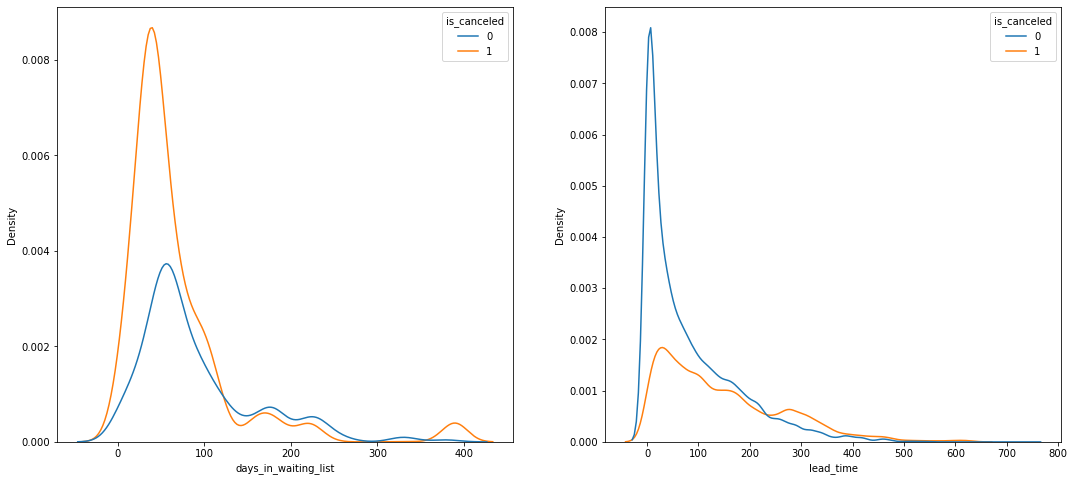

In [104]:
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = hotel_df['lead_time'], hue = hotel_df['is_canceled'])
plt.show()

#### We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

#### Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.


### Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation of bookings

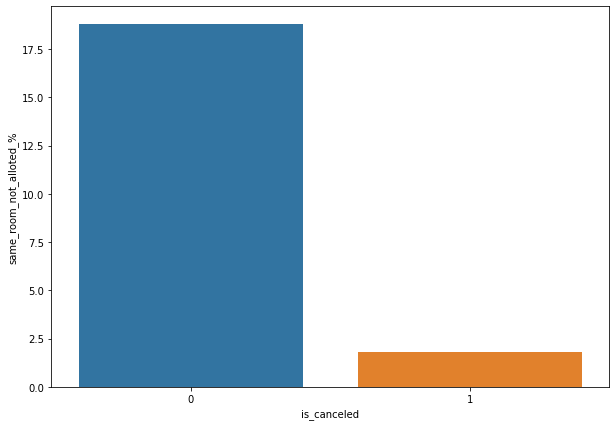

In [105]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_df['same_room_not_alloted'] = hotel_df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

#### We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

## <b> (4) Time wise analysis </b>

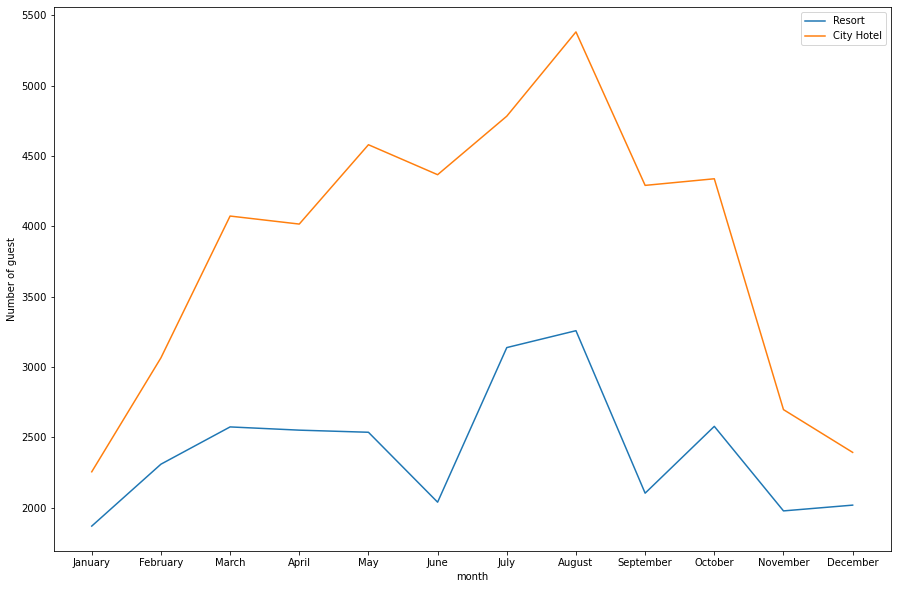

In [106]:
#Which are the most busy months?
d_month = hotel_df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
data_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

#### Most number of guest comes in month of August.

### Now lets see which month results in high revenue.

In [107]:
data_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
data_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]

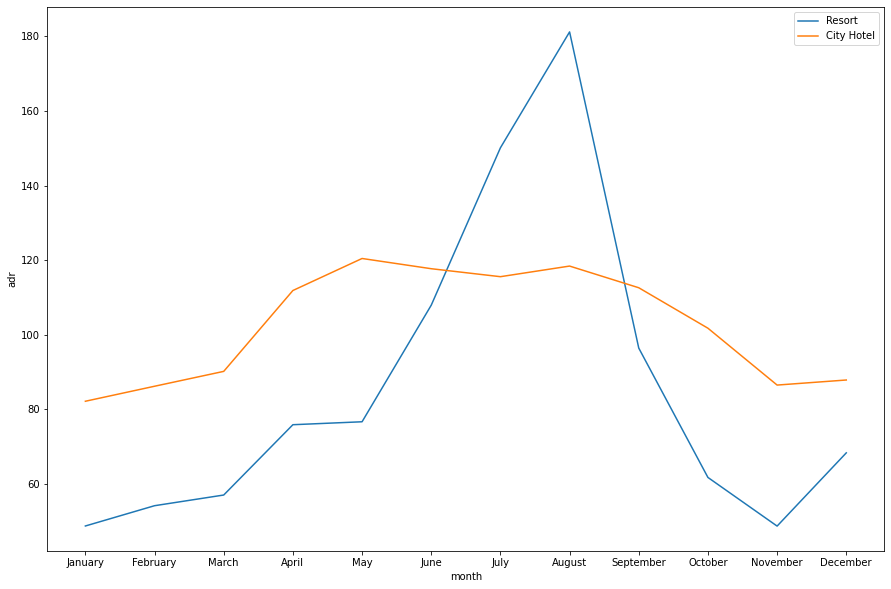

In [108]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

### Now let us check the trend of arrival_num and avg adr within a month.

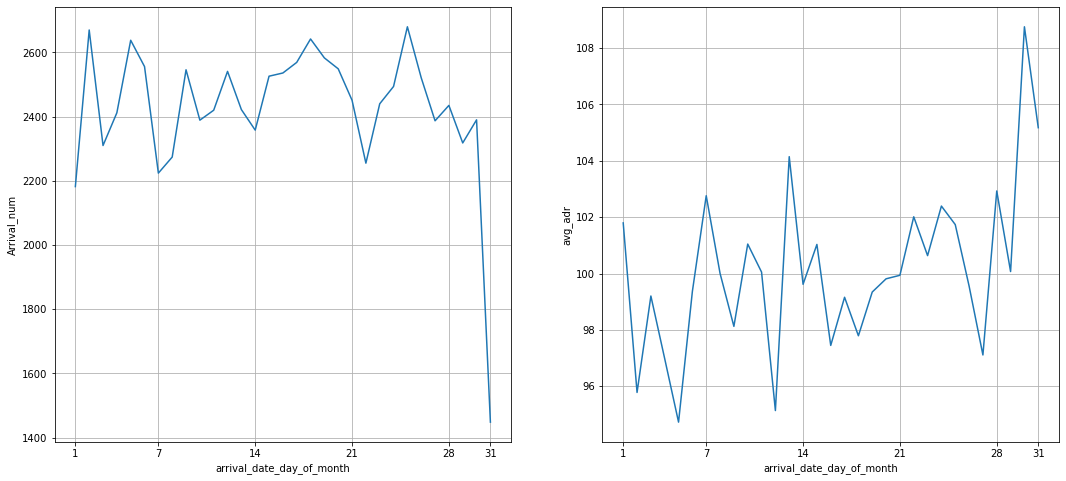

In [109]:

d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

#### We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.

#### Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.


### Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

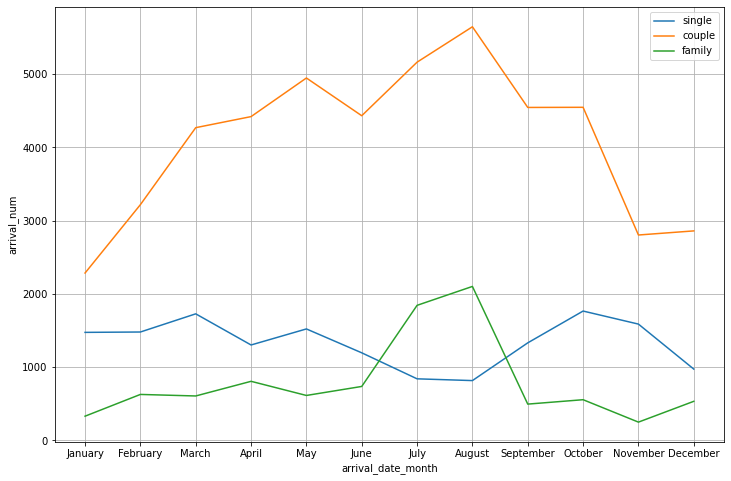

In [110]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

#### All of market segment mostly have special request.

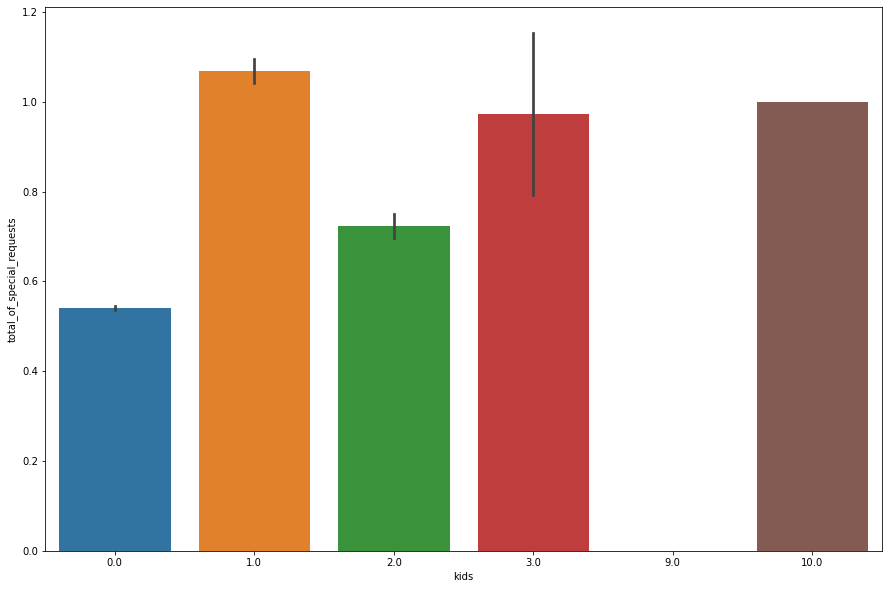

In [112]:
#Special request accoring to number of kid.
hotel_df['kids'] = hotel_df['children']+hotel_df['babies']
sns.barplot(x="kids", y="total_of_special_requests",data= hotel_df)
fig = plt.gcf()
fig.set_size_inches(15,10)

In [113]:
filter = hotel_df['is_canceled'] == 0
data = hotel_df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0,0.0


In [114]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted,kids,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,1,0.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,0,0.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2,2,0,0.0,2


In [115]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

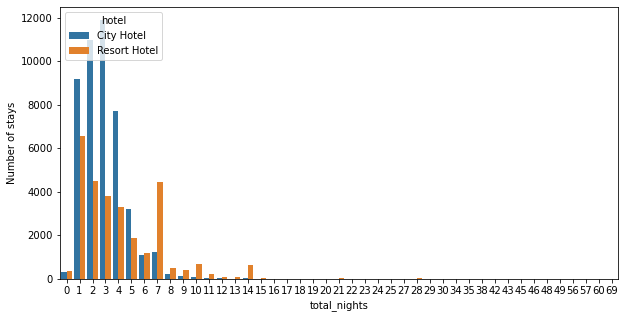

In [116]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')


#### Most people prefer to stay at the hotels of <=5 days.

Text(0, 0.5, 'Count')

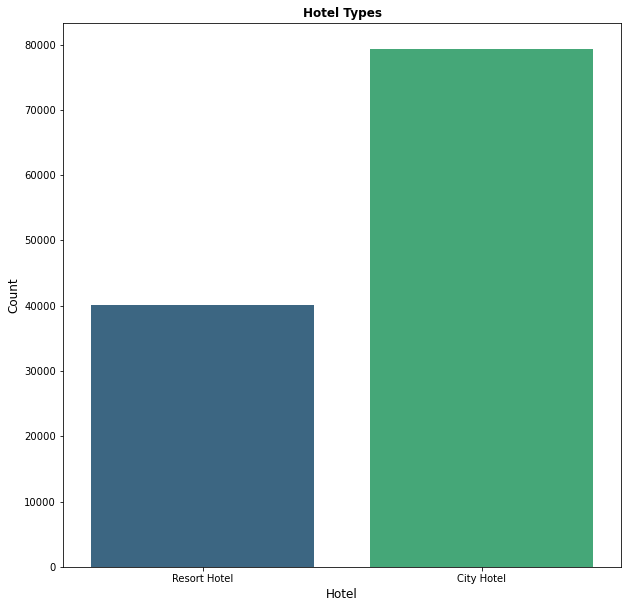

In [118]:
# Hotel types
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotelData, palette='viridis')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

According to the data, 34% of hotels booked were resort hotels while the rest of bookings were for city hotels.

Text(0, 0.5, 'Canceled vs Not Canceled')

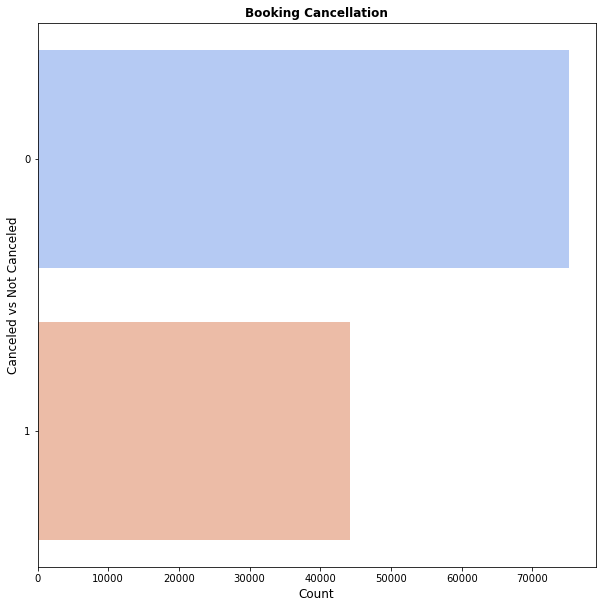

In [119]:
# Display booking cancellation 
plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= hotelData, palette='coolwarm', orient = 'v')
plt.title('Booking Cancellation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled vs Not Canceled', fontsize=12)

37% of hotel bookings were canceled.

Despite having comparable means and interquartile ranges, data from all three years reveals that the distribution of "lead time" among cancelled bookings varies every year. The distribution of "lead time" among confirmed reservations appears to be consistent over the course of the three years.

The 'arrival date month' column will be examined as a feature in the following section, but first we must change it to a more manageable format.

In [120]:
# Convert `arrival_date_month` names to numbers
hotelData['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

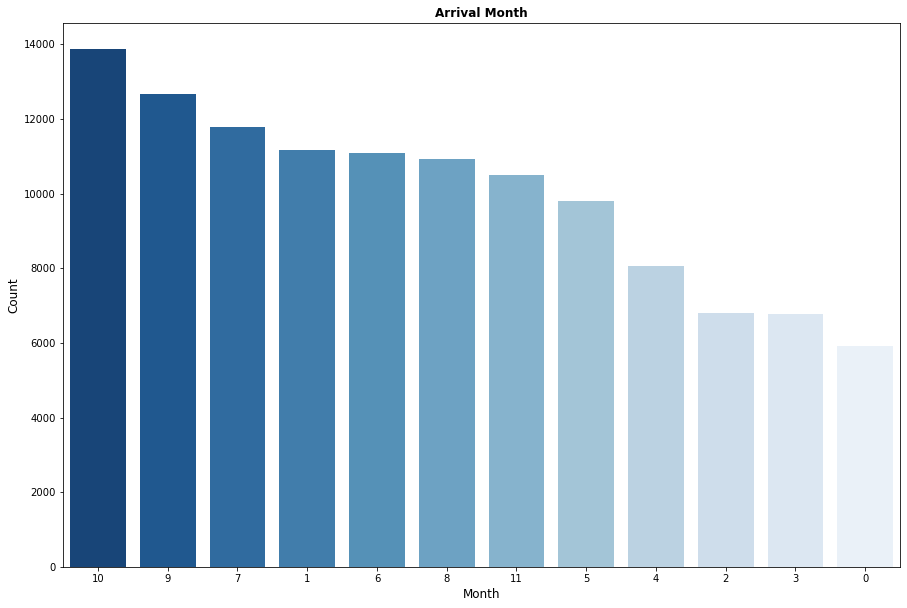

In [168]:
# Display arrival count by month 
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotelData,
              order=pd.value_counts(hotelData['arrival_date_month']).index, palette='Blues_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

August is the busiest month while January is the least busy according to the number of arrivals at hotels.

*Note* 715 entries for both weekends and weeknights had input zero. This missing data, however, is negligible enough for us to disregard.

The labels "weekend stay only," "weekday stay only," and "weekday and weekend stay" will be added to a new feature. The 715 entries that lack values will have the label "undefined data" on them.

In [126]:
# Create new feature: 'weekend_or_weekday' 
pd.options.mode.chained_assignment = None
def weekendOrWeekday(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekend_only_stay'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekday_only_stay'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'weekday_and_weekend_stay'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotelData['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
weekendOrWeekday(hotelData['stays_in_weekend_nights'],hotelData['stays_in_week_nights'], hotelData)

The relationship between "arrival date month" and our recently developed feature "weekend or weekday" will then be examined.

We discovered that the majority of reservations were for "weekday only stay" or "weekday and weekend stay." Compared to other categories, "weekend only stay" has a relatively low amount of bookings.

We'll also combine the data from the "children" and "babies" columns in another feature. Give this function the name "all children."

In [127]:
# Create new feature:`all_children`
hotelData['all_children'] = hotelData['children'] + hotelData['babies']
pd.crosstab(hotelData['adults'], hotelData['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


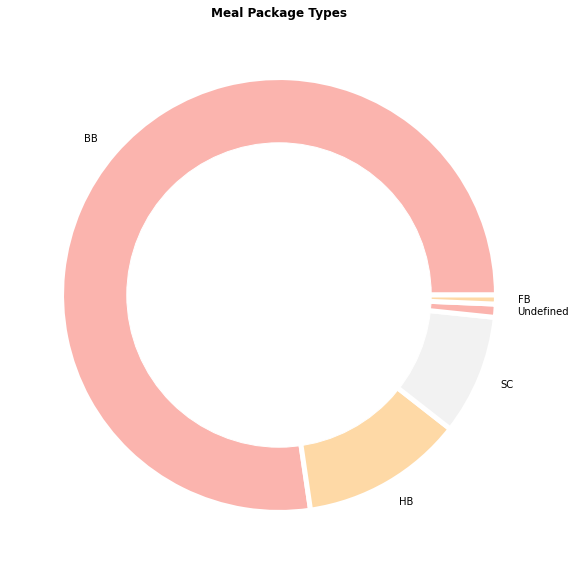

In [128]:
# Visualizing `meal` column data
mealLabels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = hotelData['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
myCircle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=mealLabels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(myCircle)
plt.title('Meal Package Types', weight='bold')
plt.show()

Almost 80% of bookings included `Bed&Breakfast` meal package.

In [129]:
# Use groupby to check out popular meal packages by hotel types
groupMealData = hotelData.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
groupMealData.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


We learned that 67% of bookings made for `City Hotel` included `Bed&Breakfast` meal package while 94% of `Resort Hotel` bookings included a `Full Board` meal package.

Let's check out the countries our hotel bookings originated from.

Text(0, 0.5, 'Bookings')

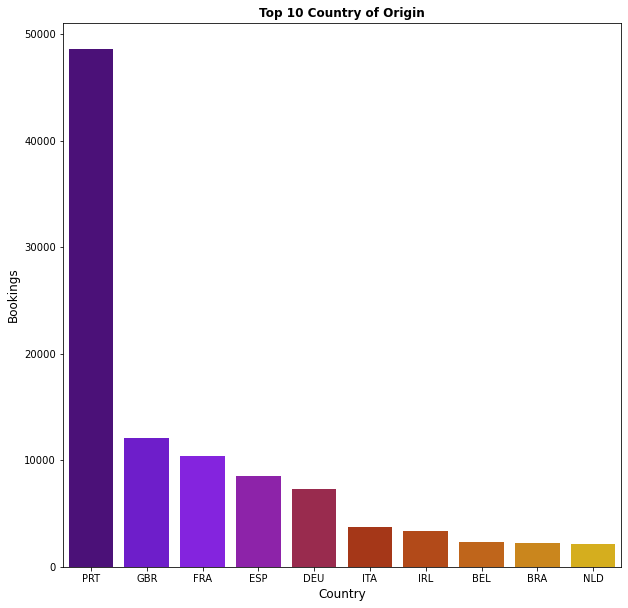

In [130]:
# Check out top 10 country of origin
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotelData, 
              order=pd.value_counts(hotelData['country']).iloc[:10].index, palette="gnuplot")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

Approximately 40% of all bookings were made from one country: Portugal.

Text(0, 0.5, 'Count')

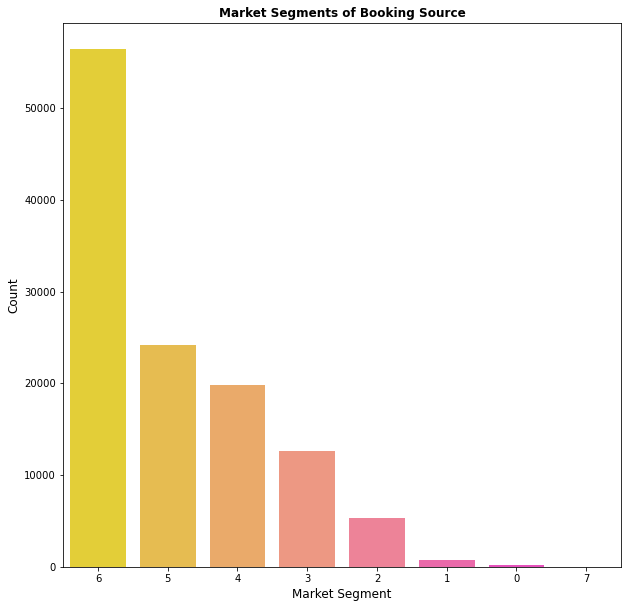

In [170]:
# Exploring `Market_segment` or booking source data
plt.figure(figsize=(10,10))
sns.countplot(hotelData['market_segment'], palette='spring_r', 
              order=pd.value_counts(hotelData['market_segment']).index)
plt.title('Market Segments of Booking Source', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

Statistics have shown that online hotel and airline reservations are becoming increasingly popular in recent years. Our data shows that most people completed their hotel reservations on a smartphone. More than 45% of bookings are made via `Online Travel Agents` while roughly 20% of bookings are made via `Offline Travel Agents`. Less than 20% of bookings were made directly by the customer.

*Note*: Every row represents the reserved room type and the distribution across the columns shows the type of room actually assigned.

Roughly 84% of bookings get to keep their reserved room while the remaining bookings require a room change.

We're also interested in looking into the relationship between ADR (Advanced Dining Reservations) and hotel booking cancellation status by month.

Text(0, 0.5, 'ADR')

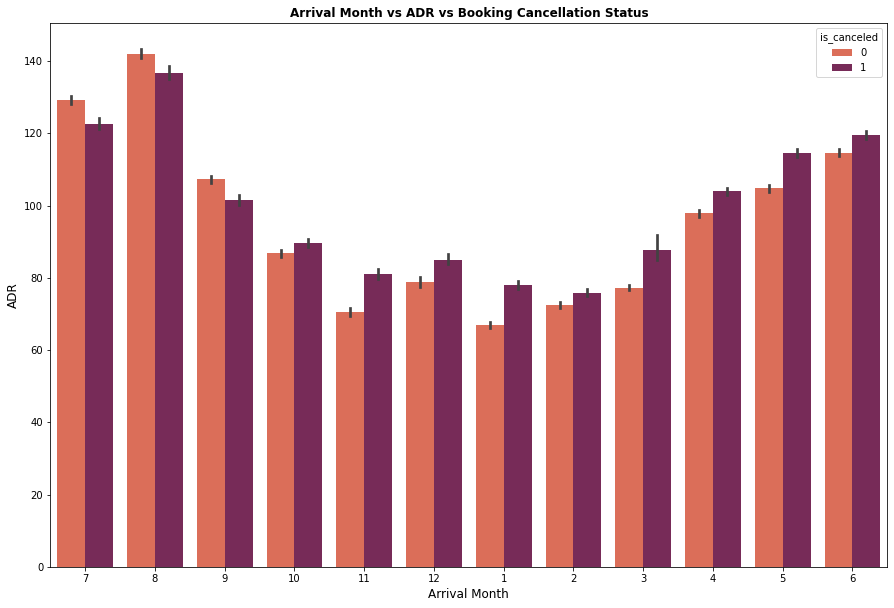

In [133]:
# Display `ADR` vs `Booking Cancellation Status` by month
hotelData['adr'] = hotelData['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'rocket_r', data=hotelData)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

As we figured out previously, August is the busiest month both in terms of number of arrivals. Additionaly, it is the busiest month in terms of the number of bookings made.

Notice that in the months of August, July and September (peak season for hotels), cancelled bookings have higher number of ADR than those that weren't cancelled.

Text(0, 0.5, 'Count')

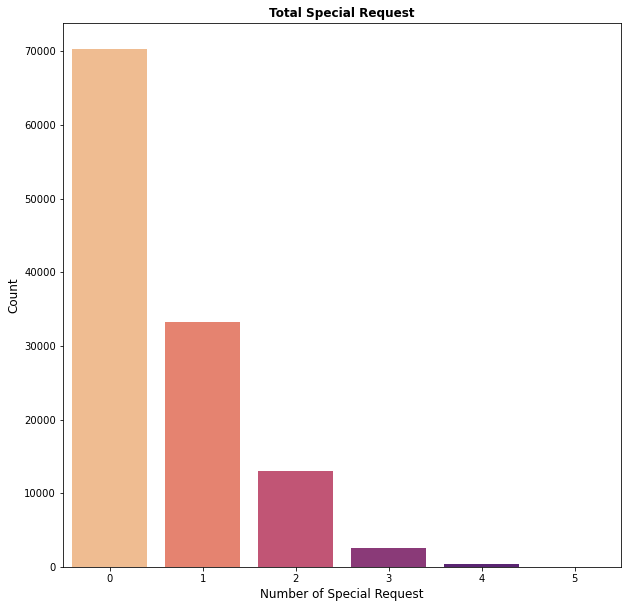

In [134]:
# Graph `total_of_special_requests` 
plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotelData, palette = 'magma_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Roughly 55% of hotel bookings do not come with any special requests.

Text(0, 0.5, 'Bookings')

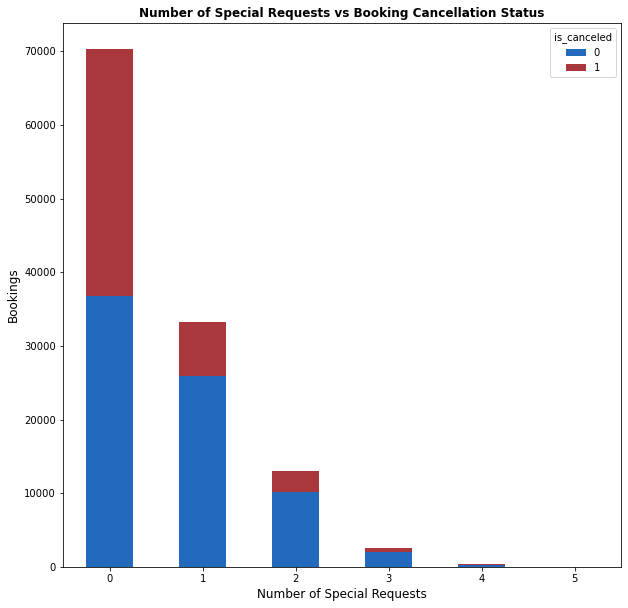

In [135]:
# Use groupby to see if number of special requests affects cancellation status
groupSpecRequest = hotelData.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
groupSpecRequest.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Number of Special Requests vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Requests', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Bookings', fontsize=12)

Very interesting! Almost half of all bookings made without any special request ended up being cancelled while bookings with more special requests are less likely to be cancelled.

## 3. Dealing with Missing Data and Correlation Matrix

Our next step is to check for any missing data.

In [136]:
# Display sum of null data
hotelData.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The `company` column is missing data on 94% of its rows. Therefore, we will be eliminating this variable. 

On the other hand, the `children` and `all_children` features have 4 missing data points. These null values will be replaced with zero. 

The `country` and `agent` features also have missing data. Since null values in `country` consist of only 1% of all the data in the column, we'll replace them with the most frequent value (mode). For the `agent` feature, missing data will be input as '0'.

In [137]:
# Fill in missing data
hotelData['children'] =  hotelData['children'].fillna(0)
hotelData['all_children'] = hotelData['all_children'].fillna(0)
hotelData['country'] = hotelData['country'].fillna(hotelData['country'].mode().index[0])
hotelData['agent']= hotelData['agent'].fillna('0')
hotelData=hotelData.drop(['company'], axis =1)

In [138]:
# Change data structure
hotelData['agent']= hotelData['agent'].astype(int)
hotelData['country']= hotelData['country'].astype(str)

Another task we need to do is analyze categorical features.

Categorical labels should be converted into a numeric format to make them more understandable and implementable for training machine learning algorithms. We can use [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for some non-ordinal features such as `country`, but due to the numerous categories, this method would incur a higher computational cost. Therefore, the [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method will be used instead.

In [139]:
# Use label encoder method for categorical features
labelencoder = LabelEncoder()
hotelData['hotel'] = labelencoder.fit_transform(hotelData['hotel'])
hotelData['arrival_date_month'] = labelencoder.fit_transform(hotelData['arrival_date_month'])
hotelData['meal'] = labelencoder.fit_transform(hotelData['meal'])
hotelData['country'] = labelencoder.fit_transform(hotelData['country'])
hotelData['market_segment']= labelencoder.fit_transform(hotelData['market_segment'])
hotelData['distribution_channel']=labelencoder.fit_transform(hotelData['distribution_channel'])
hotelData['is_repeated_guest'] = labelencoder.fit_transform(hotelData['is_repeated_guest'])
hotelData['reserved_room_type'] = labelencoder.fit_transform(hotelData['reserved_room_type'])
hotelData['assigned_room_type'] = labelencoder.fit_transform(hotelData['assigned_room_type'])
hotelData['deposit_type'] = labelencoder.fit_transform(hotelData['deposit_type'])
hotelData['agent'] = labelencoder.fit_transform(hotelData['agent'])
hotelData['customer_type'] = labelencoder.fit_transform(hotelData['customer_type'])
hotelData['reservation_status'] = labelencoder.fit_transform(hotelData['reservation_status'])
hotelData['weekend_or_weekday'] = labelencoder.fit_transform(hotelData['weekend_or_weekday'])

After encoding the categorical data, two DataFrames will be created. One DataFrame contains categorical data and the other one contains numerical data. We will use these two DataFrames to create a correlation matrix. We'll be computing the Spearman coefficient of the categorical data and Pearson coefficient of the numerical data.

In [140]:
# Create new DataFrame for categorical data
hotelDataCategorical = hotelData[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]
# Check DataFrame details
hotelDataCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int32
 1   is_canceled           119390 non-null  int64
 2   arrival_date_month    119390 non-null  int32
 3   meal                  119390 non-null  int32
 4   country               119390 non-null  int32
 5   market_segment        119390 non-null  int32
 6   distribution_channel  119390 non-null  int32
 7   is_repeated_guest     119390 non-null  int64
 8   reserved_room_type    119390 non-null  int32
 9   assigned_room_type    119390 non-null  int32
 10  deposit_type          119390 non-null  int32
 11  agent                 119390 non-null  int64
 12  customer_type         119390 non-null  int32
 13  reservation_status    119390 non-null  int32
 14  weekend_or_weekday    119390 non-null  int32
dtypes: int32(12), int64(3)
memory usag

In [141]:
#Create new DataFrame for numerical data
hotelDataNumerical= hotelData.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
# Check DataFrame details
hotelDataNumerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

Text(0.5, 1.0, 'Correlation Matrix-Spearman Method (Categorical Data)')

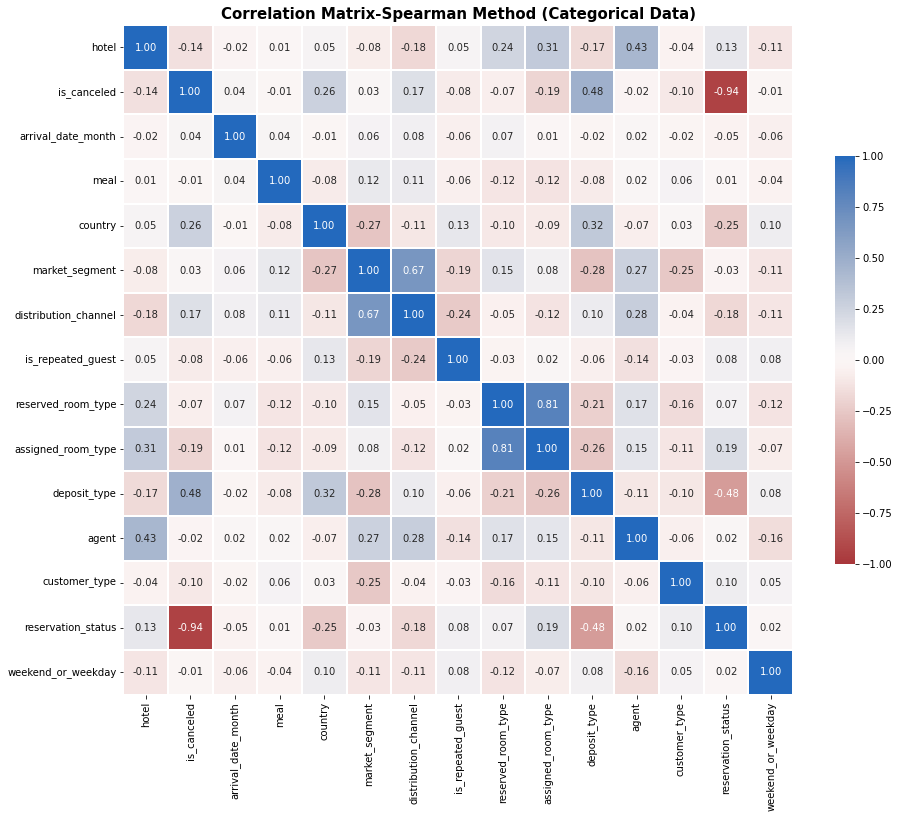

In [171]:
# Correlation matrix with Spearman method
plt.figure(figsize=(15,15))
corrCategorical=hotelDataCategorical.corr(method='spearman')
maskCategorical = np.triu(np.ones_like(corrCategorical, dtype=np.bool))
sns.heatmap(corrCategorical, annot=True, fmt=".2f", cmap='vlag_r', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix-Spearman Method (Categorical Data)",size=15, weight='bold')

We learned that `reservation_ status` as a feature has a negative correlation with hotel booking cancellation. However, we can see the relationship between the feature and target variable in detail below:

In [143]:
# Create table displaying `reservation_status` vs `is_canceled`
pd.crosstab(columns = hotelData['reservation_status'], index = hotelData['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,75166,0,75166
1,43017,0,1207,44224
Total,43017,75166,1207,119390


To prevent overfitting, `reservation_status` will be eliminated as a feature.

Text(0.5, 1.0, 'Correlation Matrix-Pearson Method (Numerical Data)')

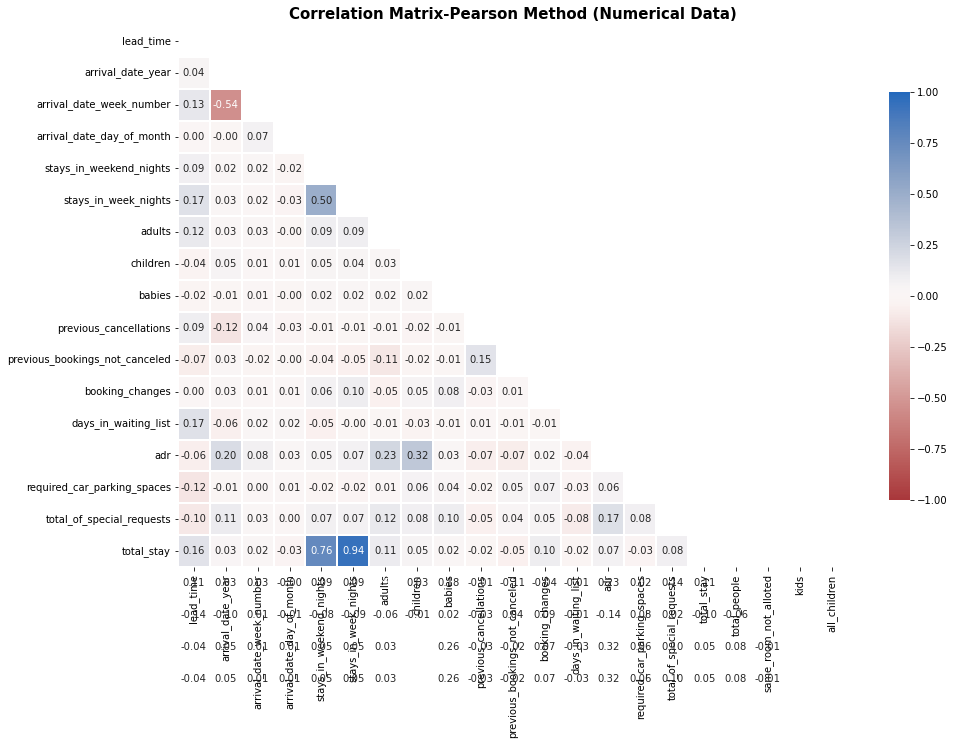

In [172]:
# Correlation matrix with Pearson method
plt.figure(figsize=(15,15))
corrNumerical=hotelDataNumerical.corr(method='pearson')
maskNumerical = np.triu(np.ones_like(corrNumerical, dtype=np.bool))
sns.heatmap(corrNumerical, annot=True, fmt=".2f", cmap='vlag_r', mask= maskNumerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix-Pearson Method (Numerical Data)",size=15, weight='bold')

In [145]:
# Finding highly correlated features
corrMaskCategorical = corrCategorical.mask(maskCategorical)
corrValuesCategorical = [c for c in corrMaskCategorical.columns if any (corrMaskCategorical[c] > 0.90)]
corrMaskNumerical = corrNumerical.mask(maskNumerical)
corrValuesNumerical = [c for c in corrMaskNumerical.columns if any (corrMaskNumerical[c] > 0.90)]
print(corrValuesCategorical, corrValuesNumerical)

[] ['stays_in_week_nights', 'adults', 'children', 'kids']


There is also high correlation between hotel booking cancellation and `children` & `all_children` features. Since the `all_children` feature is comprised of the `children` and `babies` features, we can remove `children` as a feature.

Additionally, we will also be removing `reservation_status_date` from our features since it contains date-type data that cannot be converted into a different type.

In [146]:
# Dropping some features from data
hotelData = hotelData.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [147]:
# Copying data for hyperparameter tuning and further analysis
hotelDataModel = hotelData

## 4. Hyperparameter Tunning and Calculating Feature Importance

Next, we will be searching for optimum hyperparameters for several tree-based machine learning algorithms with the help of a grid search algorithm
Hyperparameter tuning helps us create more accurate predictions. Therefore, we will set the values for our hyperparameters before our model training process.

Another important task to perform prior to training our model is to look at the graph after using `Extreme Gradient Boosting` (XGBoost in short). A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each feature: Importance scores are calculated explicitly for each feature in the dataset, allowing features to be ranked and compared to each other.

In [148]:
# Seperate target variable
hotelDataTunning = hotelData
y = hotelDataTunning.iloc[:,1]
X = pd.concat([hotelDataTunning.iloc[:,0],hotelDataTunning.iloc[:,2:30]], axis=1)

In [173]:
# Permutation Importance graph with XGB Classifier algorithm
params = {
    'criterion': 'giny', 
    'learning_rate': 0.01, 
    'max_depth': 5,
    'n_estimators': 100, 
    'objective': 'binary:logistic', 
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

[16:12:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "parameters" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:12:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [154]:
# Feature scores table
for i,v in enumerate(sorted_idx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 9.00000
Feature: 1, Score: 28.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 8.00000
Feature: 4, Score: 13.00000
Feature: 5, Score: 7.00000
Feature: 6, Score: 22.00000
Feature: 7, Score: 14.00000
Feature: 8, Score: 6.00000
Feature: 9, Score: 10.00000
Feature: 10, Score: 5.00000
Feature: 11, Score: 27.00000
Feature: 12, Score: 16.00000
Feature: 13, Score: 3.00000
Feature: 14, Score: 19.00000
Feature: 15, Score: 4.00000
Feature: 16, Score: 24.00000
Feature: 17, Score: 25.00000
Feature: 18, Score: 23.00000
Feature: 19, Score: 2.00000
Feature: 20, Score: 15.00000
Feature: 21, Score: 12.00000
Feature: 22, Score: 17.00000
Feature: 23, Score: 18.00000
Feature: 24, Score: 26.00000
Feature: 25, Score: 1.00000
Feature: 26, Score: 20.00000
Feature: 27, Score: 21.00000
Feature: 28, Score: 11.00000


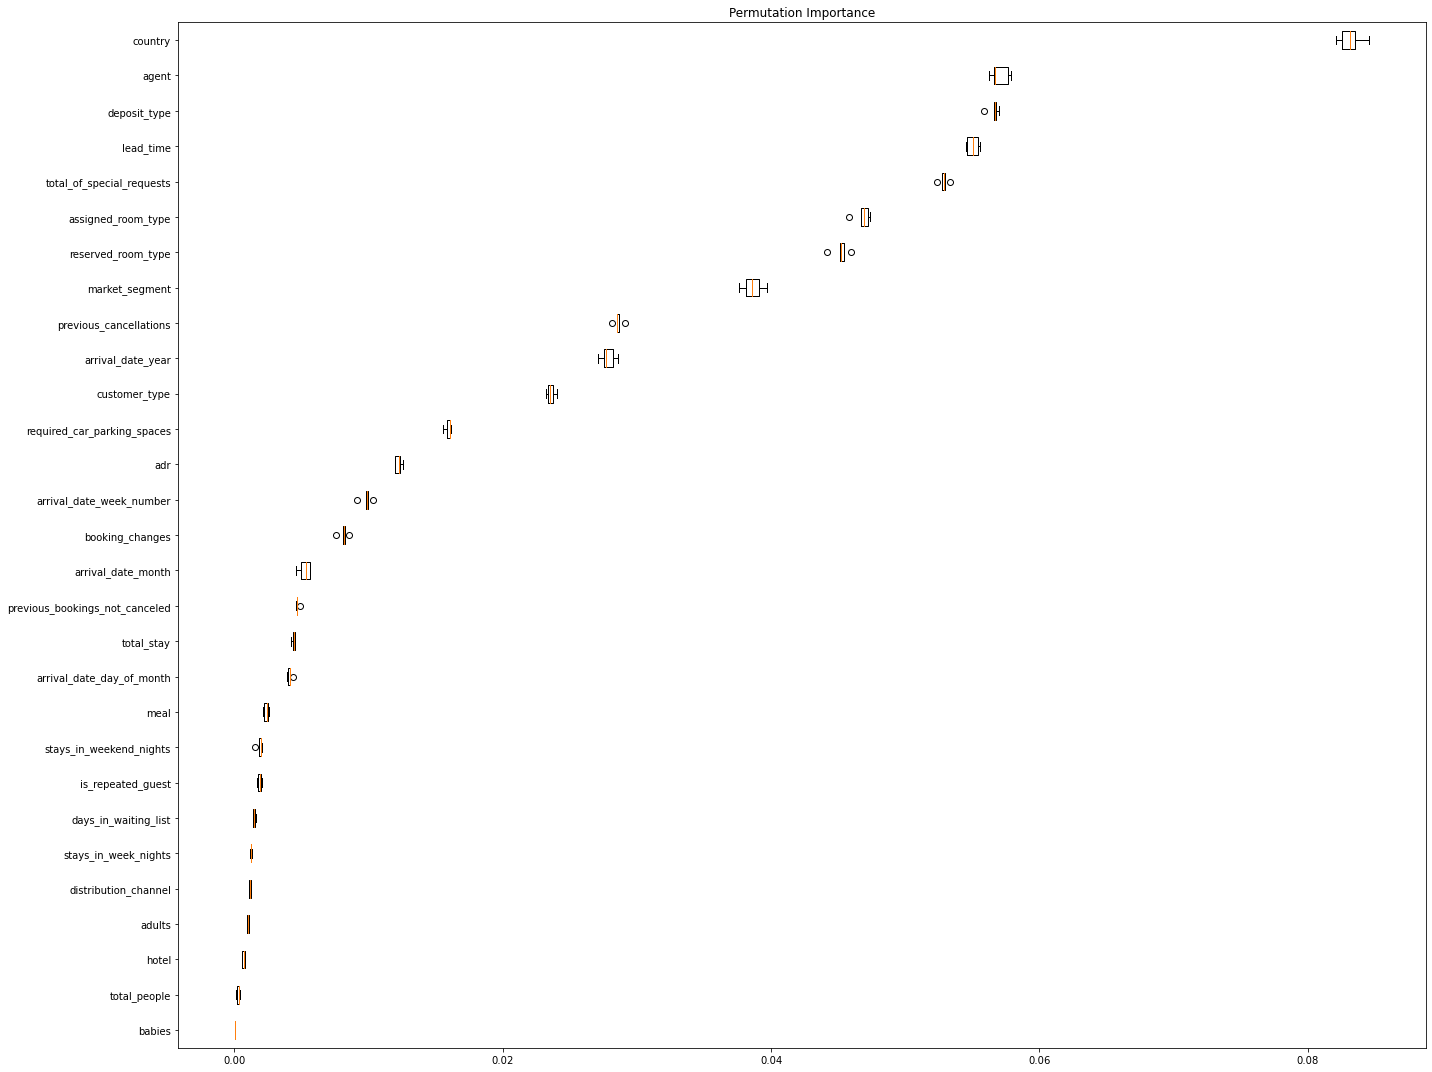

In [155]:
# Permutation Importance Graph 
fig, ax = plt.subplots(figsize=(20,15))

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

The feature `babies` is deemed unimportant among the 29 features we will be using for our prediction, and therefore will be removed.

In [156]:
# Drop `baby` feature from data
hotelDataModel = hotelDataModel.drop(['babies'], axis=1)

## 5. Model Building

Several tree-based techniques, including Decision Tree, Random Forest, Extra Trees Classifier, and Extreme Gradient Boosting, will be used to create the models. 'XGBoost' has been selected as one of the boosting algorithms, 'Random Forest' and 'Extra Tree Classification' have been selected as bagging methods, and 'Decision Tree' has been selected as one tree algorithm.

We will divide our data into a training set and a test set (70% and 30%, respectively) before we develop our model. We'll use *Standard Scaler* to standardize the data from "X train" and "X test." After that, the Stratified K-Fold Cross Validation method will be used for resampling. Implementing cross-validation is important to avoid overfitting. Model parameters have been defined in a previous section.

In [157]:
# Seperate target variable for model building 
y_model = hotelDataModel.iloc[:,1]
X_model = pd.concat([hotelDataTunning.iloc[:,0],hotelDataTunning.iloc[:,2:30]], axis=1)
y_model.describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [158]:
# Split to train and test with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify = y)

In [159]:
# Use standard scaler
standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

In [160]:
# Stratified K-Fold Cross Validation Method
kfold_cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X_model,y_model):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

In [161]:
# Decision Tree Model Building
dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# Fit the model
dtc_model.fit(X_train, y_train)

# Model prediction
predict_dtc = dtc_model.predict(X_test)

In [162]:
# Random Forest Model Building
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)
# Fit the model
estimator= rf_model.fit(X_train, y_train)
# Model prediction
predict_rf = rf_model.predict(X_test)

In [163]:
# Extra Treees Classsifier Model Building
etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# Fit the model
etc_model.fit(X_train, y_train)

# Model prediction
predict_etc = etc_model.predict(X_test)

In [174]:
# Extreme Gradient Boosting Model Building
xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# Fit the model
xgb_model.fit(X_train, y_train)
# Model prediction
predict_xgb = xgb_model.predict(X_test)

[16:12:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:12:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 6. Model Evaluation

The last part is comparison of classification reports of ML models.

In [165]:
# Print classification reports 
print("RF", classification_report(y_test, predict_rf))
print("DTC",classification_report(y_test, predict_dtc))
print("ETC", classification_report(y_test, predict_etc))
print("XGB", classification_report(y_test, predict_xgb))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15033
           1       0.88      0.79      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

DTC               precision    recall  f1-score   support

           0       0.86      0.90      0.88     15033
           1       0.81      0.76      0.78      8845

    accuracy                           0.84     23878
   macro avg       0.84      0.83      0.83     23878
weighted avg       0.84      0.84      0.84     23878

ETC               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15033
           1       0.90      0.73      0.80      8845

    accuracy                           0.87     23878
   macro avg       0.88      0.84      0.85     23878
weighted avg       0.87      0.87      0.86     23878

XGB     

Text(570.5454545454544, 0.5, 'Actual Labels')

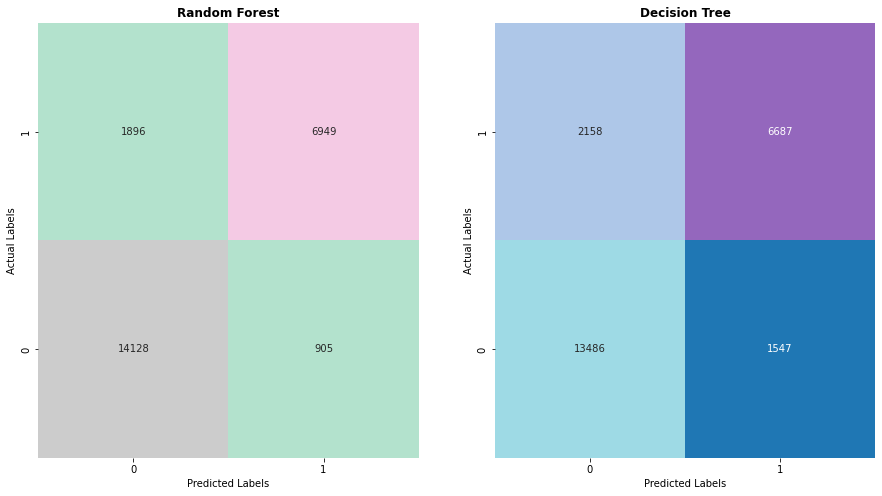

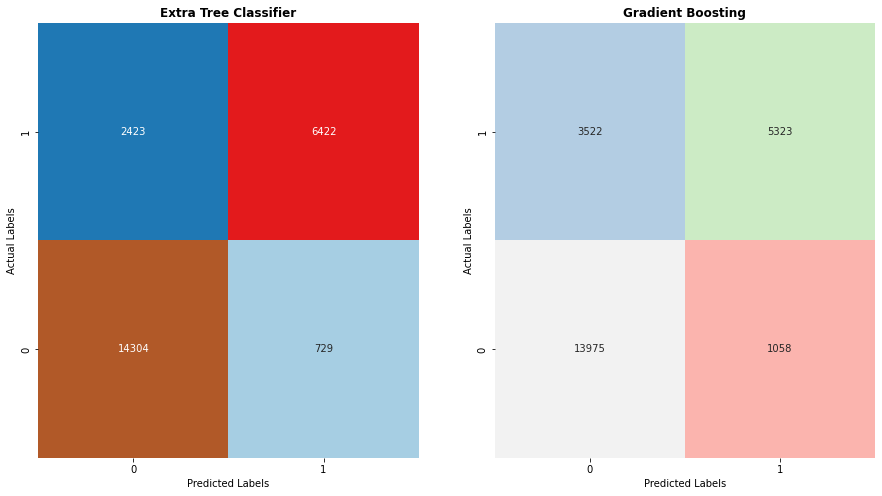

In [166]:
# Confusion matrix 
DTC_matrix = confusion_matrix(y_test, predict_dtc)
RF_matrix = confusion_matrix(y_test, predict_rf)
ETC_matrix = confusion_matrix(y_test, predict_etc)
XGB_matrix = confusion_matrix(y_test, predict_xgb) 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(ETC_matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Extra Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(XGB_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Gradient Boosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')

Let's first compare the *accuracy* of the results.

Our *Random Forest* model has the highest accuracy with a correct prediction rate of 88%. 

Our *Random Forest* and *Extra Tree Classifier* models share the highest precision ratios. It means that both models predicted around 88% of all the positive labels correctly. On the other hand, the *Random Forest* model also has a high recall ratio, correctly predicting 79% of positive observations correctly. In conclusion, our *Random Forest* model gives us the best prediction for hotel booking cancellations.